In [1]:
## Fix markers or kind, error bars

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

drug_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

drugtrial_df = pd.merge(drug_df, trial_df, on="Mouse ID")

# Display the data table for preview

drugtrial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Avg_Tumor_Volume = drugtrial_df.groupby(["Drug", "Timepoint"]).mean()
Avg_Tumor_Volume = Avg_Tumor_Volume.drop("Metastatic Sites", axis=1)
# Convert to DataFrame
Avg_Tumor_Volume = Avg_Tumor_Volume.reset_index()
# Preview DataFrame
Avg_Tumor_Volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Standard_Error = Avg_Tumor_Volume.sem(axis = 1)

# # Convert to DataFrame
Avg_Tumor_Volume["SEM"] = Standard_Error
# Grouped_Drugs = pd.DataFrame(STD_Tumors)
# # Preview DataFrame
Avg_Tumor_Volume.head(13)


,Drug,Timepoint,Tumor Volume (mm3),SEM
0,Capomulin,0,45.000000,22.500000
1,Capomulin,5,44.266086,19.633043
2,Capomulin,10,43.084291,16.542145
3,Capomulin,15,42.064317,13.532159
4,Capomulin,20,40.716325,10.358163
5,Capomulin,25,39.939528,7.469764
6,Capomulin,30,38.769339,4.384670
7,Capomulin,35,37.816839,1.408419
8,Capomulin,40,36.958001,1.521000
9,Capomulin,45,36.236114,4.381943


In [5]:
# Minor Data Munging to Re-Format the Data Frames
Table = Avg_Tumor_Volume.pivot_table(index="Timepoint",
                                     values="Tumor Volume (mm3)", columns="Drug")
# Preview that Reformatting worked
Table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


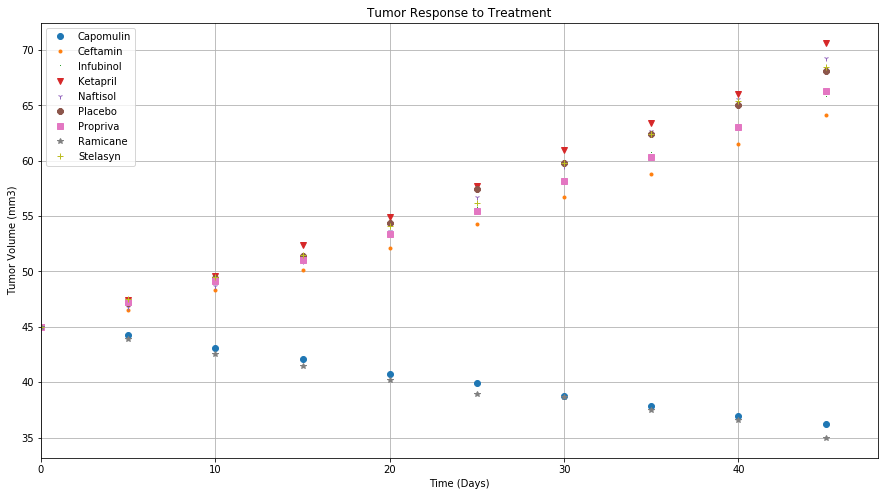

In [6]:
#https://stackoverflow.com/questions/14178194/python-pandas-plotting-options-for-multiple-lines#
styles=["o", ".", ",", "v", "1", "8", "s", "*", "+"]
fig, ax = plt.subplots()

for col, style in zip( Table.columns, styles):
    Table[col].plot(kind="line", style=style, ax = ax, 
                    figsize=(15,8), xlim=(0,48), grid=True)
ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
ax.set_figsize=(15,8)

# Save the Figure
plt.savefig('Tumor_Responses.png')

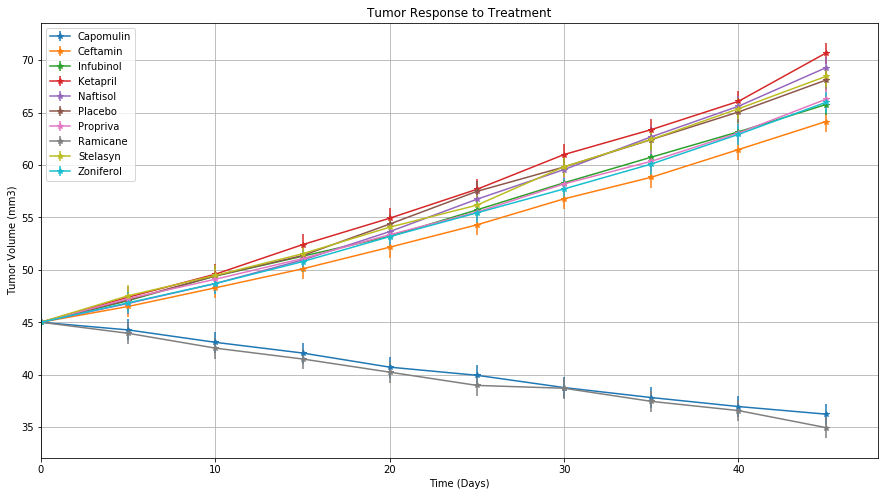

In [7]:
# Generate the Plot (with Error Bars)
ax = Table.plot(title="Tumor Response to Treatment", marker = "*", 
                grid=True,xlim=(0,48), figsize=(15,8),yerr=True
                )
# ax.markers=["o", ".", ",", "v", "1", "8", "s", "*", "+"]
ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig('Tumor_Responses.png')

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

Metastatic_Sites = drugtrial_df.groupby(["Drug", "Timepoint"]).mean()
Metastatic_Sites = Metastatic_Sites.drop("Tumor Volume (mm3)", axis=1)
# Convert to DataFrame
Metastatic_Sites = Metastatic_Sites.reset_index()
# Preview DataFrame
Metastatic_Sites.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Metastatic_Sites["SEM"] = Metastatic_Sites.sem(axis= 1)
# Preview DataFrame
Metastatic_Sites.head(15)

,Drug,Timepoint,Metastatic Sites,SEM
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,2.420000
2,Capomulin,10,0.320000,4.840000
3,Capomulin,15,0.375000,7.312500
4,Capomulin,20,0.652174,9.673913
5,Capomulin,25,0.818182,12.090909
6,Capomulin,30,1.090909,14.454545
7,Capomulin,35,1.181818,16.909091
8,Capomulin,40,1.380952,19.309524
9,Capomulin,45,1.476190,21.761905


In [10]:

# Minor Data Munging to Re-Format the Data Frames
Table = Metastatic_Sites.pivot_table(index="Timepoint", values="Metastatic Sites", columns="Drug")
# Preview that Reformatting worked
Table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


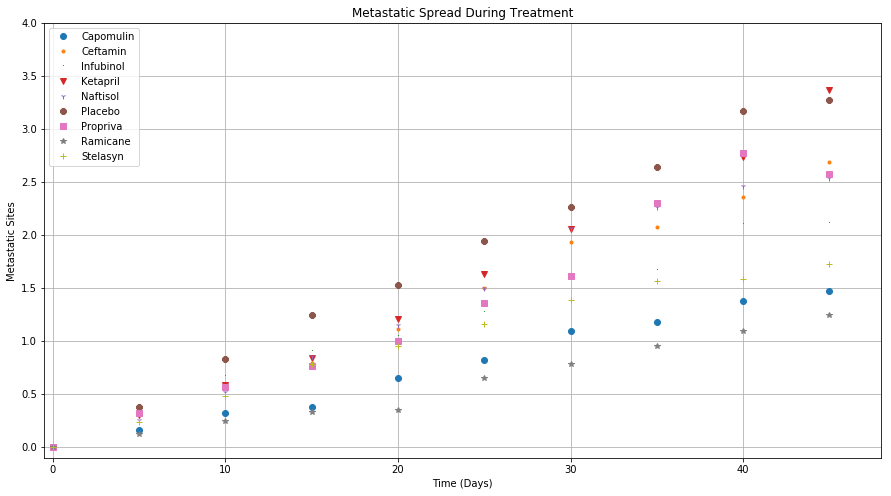

In [11]:
fig, ax = plt.subplots()

for col, style in zip(Table.columns, styles):
    Table[col].plot(kind="line", style=style, ax = ax, 
                    figsize=(15,8), xlim=(-0.5,48), grid=True, ylim=(-0.1,4))
ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Metastatic Sites")
ax.set_title("Metastatic Spread During Treatment")
ax.set_figsize=(15,8)

# Save the Figure
plt.savefig('Metastatic_Sites.png')

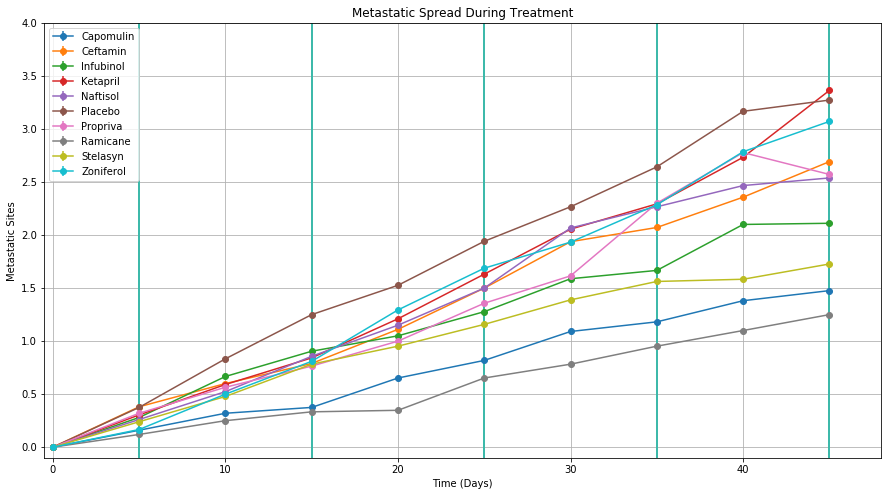

In [12]:
# Generate the Plot (with Error Bars)
ax = Table.plot(title="Metastatic Spread During Treatment",marker="o", 
                yerr=Metastatic_Sites["SEM"], grid=True, ylim=(-0.1,4), xlim=(-0.5,48), figsize=(15,8))

ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Metastatic Sites")

# Save the Figure
plt.savefig('Metastatic_Sites.png')

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) 
Mouse_Count = drugtrial_df.groupby(["Drug", "Timepoint"]).count()
Mouse_Count = Mouse_Count.drop(["Metastatic Sites","Tumor Volume (mm3)"], axis=1)
# Convert to DataFrame
Mouse_Count = Mouse_Count.reset_index()
# Preview DataFrame
Mouse_Count.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
Mouse_pct = Mouse_Count.groupby(['Drug', 'Timepoint']).agg({'Mouse ID': 'sum'})

Mouse_pct = Mouse_pct.div(Mouse_pct.iloc[0], level='Mouse ID') * 100
Mouse_pct = Mouse_pct.rename(columns ={'Mouse ID':'Percent Alive'})
Mouse_pct.head()

Percent Alive
Drug      Timepoint               
Capomulin 0                  100.0
          5                  100.0
          10                 100.0
          15                  96.0
          20                  92.0

In [16]:
# Minor Data Munging to Re-Format the Data Frames
Table = Mouse_pct.pivot_table(index="Timepoint", 
                              values='Percent Alive', columns="Drug")
# Preview that Reformatting worked
Table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


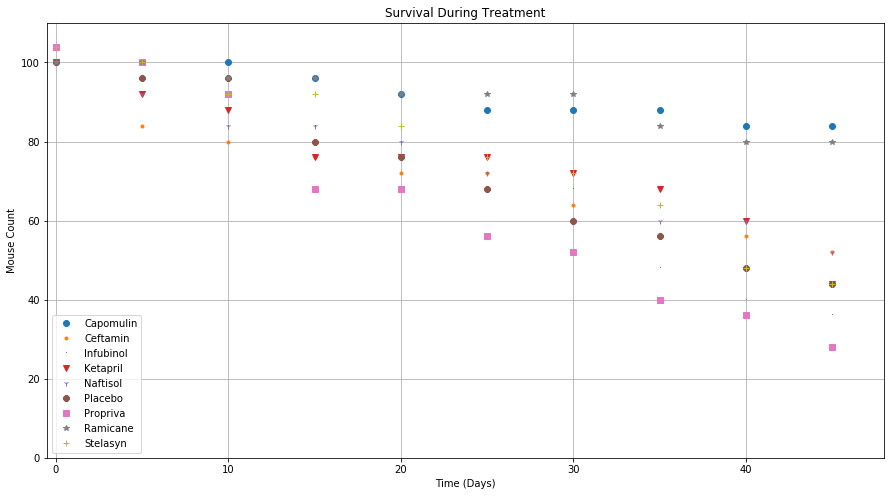

In [17]:
fig, ax = plt.subplots()

for col, style in zip(Table.columns, styles):
    Table[col].plot(kind="line", style=style, ax = ax, 
                    figsize=(15,8), xlim=(-0.5,48), grid=True, ylim=(0,110))
ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Mouse Count")
ax.set_title("Survival During Treatment")
ax.set_figsize=(15,8)

# Save the Figure
plt.savefig('Metastatic_Sites.png')

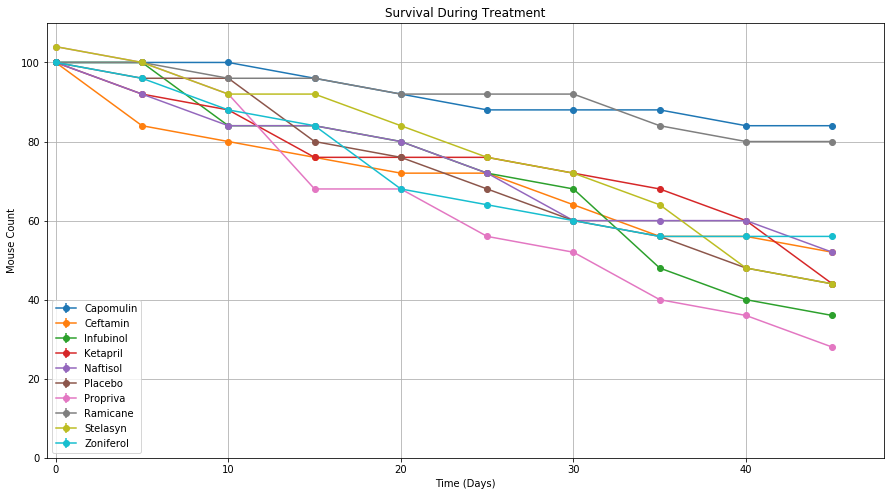

In [18]:
# Generate the Plot (with Error Bars)
ax = Table.plot(title="Survival During Treatment",marker="o", yerr=False, 
                grid=True, ylim=(0,110), xlim=(-0.5,48), figsize=(15,8))

ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Mouse Count")

# Save the Figure
plt.savefig('Survival Rate.png')

In [19]:
Avg_Tumor_Volume.head()

,Drug,Timepoint,Tumor Volume (mm3),SEM
0,Capomulin,0,45.000000,22.500000
1,Capomulin,5,44.266086,19.633043
2,Capomulin,10,43.084291,16.542145
3,Capomulin,15,42.064317,13.532159
4,Capomulin,20,40.716325,10.358163


## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
Avg_Tumor_Volume = drugtrial_df.groupby(["Drug", "Timepoint"]).mean()
Tumor_Change = Avg_Tumor_Volume.pivot_table(index="Timepoint", 
                              values='Tumor Volume (mm3)', columns="Drug")
Tumor_Change = round(Tumor_Change.pct_change() ,2)
Tumor_Change = Tumor_Change.fillna(0)
Tumor_Change = Tumor_Change.tail(1)
Tumor_Change = Tumor_Change.stack()
Tumor_Change = Tumor_Change.reset_index(level = 0, drop=True)
Tumor_Change

Drug
Capomulin   -0.02
Ceftamin     0.04
Infubinol    0.04
Ketapril     0.07
Naftisol     0.06
Placebo      0.05
Propriva     0.05
Ramicane    -0.04
Stelasyn     0.05
Zoniferol    0.05
dtype: float64

In [55]:
# # Store all Relevant Percent Changes into a Tuple
Pct_Changed = tuple(zip(Tumor_Change,Tumor_Change.index))                             
# Splice the data between passing and failing drugs
Pct_Changed = sorted(Pct_Changed)
Efficacy, Drug = zip(*Pct_Changed)

colors = []
for value in Efficacy: 
    if value > 0:
        colors.append('r')
    else:
        colors.append('g')


colors


['g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']

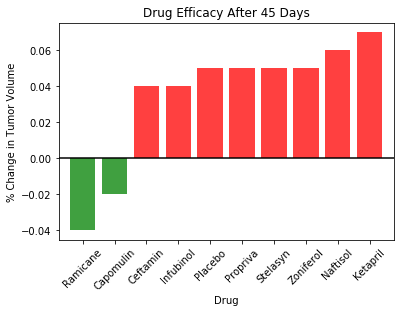

In [62]:
tick_locations = []
x_axis = np.arange(0, len(Drug))
for x in x_axis:
    tick_locations.append(x)


plt.title("Drug Efficacy After 45 Days")
plt.xlabel("Drug")
plt.ylabel("% Change in Tumor Volume")
plt.xlim(-0.75, len(Drug)-.25)
plt.hlines(0,-0.75,len(Drug))
plt.bar(Drug, Efficacy, color=colors, alpha=0.75, align="center")
plt.xticks(tick_locations, Drug, rotation=45)



# Save the Figure

plt.savefig('Drug_Efficacy.png')
# Show the Figure
fig.show()
